# EP 01. 인공지능과 가위바위보 하기

사실 별 거 아닌데 !!!!!!!!!! 성능 안 나와서 노트북 뿌실 뻔 함 !!!!!!! <br/>
** 삽질을 많이 해서 가독성이 떨어질 수 있음

# 1. 데이터 불러오기
저는 lms에 나와있는 https://teachablemachine.withgoogle.com/ 사이트를 이용해 가위 바위 보 이미지를 직접 촬영했습니다.

In [1]:
# !unzip -uq "train1/scissor.zip" -d "train1/scissor"
# !unzip -uq "train1/paper.zip" -d "train1/paper"
# !unzip -uq "train1/rock.zip" -d "train1/rock"

## 1-1. 필요한 라이브러리 호출

In [2]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np

## 1-2. 이미지 resize
다운로드 받은 이미지의 원래 크기는 224x224였고 이를 28x28로 변경하려 한다.

🧤 가위, 바위, 보의 이미지는 각각 100장씩, 총 300장이다. <br/>
🧤 이미지들이 잘 resize 되었고, 새로 save도 되었다. <br/>
**+여기서 바로 save하지 않고 원본 데이터는 따로 저장했으면 더 좋았을듯!**

In [3]:
def resize_images(img_path):
    images = glob.glob(img_path + '/*.jpg') # jpg로 끝나는 모든 파일
    
    print(len(images), " images to be resized.")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img) # 원본
        new_img = old_img.resize(target_size, Image.ANTIALIAS) # resize
        new_img.save(img, "JPEG") # 저장
        
    print(len(images), " images resized.")

In [4]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여 resize
s_path = './train1/scissor/scissor'
resize_images(s_path)
print('가위 이미지 resize 완료!')
print('=========================')

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여 resize
r_path = './train1/rock/rock'
resize_images(r_path)
print('바위 이미지 resize 완료!')
print('=========================')

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여 resize
p_path = './train1/paper/paper'
resize_images(p_path)
print('보 이미지 resize 완료!')
print('=========================')

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


## 1-3. 이미지 불러오기

#### 가위(0), 바위(1), 보(2)로 클래스를 할당

- train data set은 총 300개이고, 크기는 (28, 28)로 잘 조정되었음을 알 수 있다.
- 컬러 이미지이므로 마지막 채널 값은 3

In [5]:
def load_data(img_path, number_of_data):
    
    # 가위(0), 바위(1), 보(2)
    img_size = 28
    color = 3
    
    # 이미지 데이터와 라벨(가위(0), 바위(1), 보(2)) 데이터를 담을 행렬(matrix) 영역 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    
    for file in glob.iglob(img_path + 'scissor/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0 # 가위(0)
        idx = idx + 1
    
    for file in glob.iglob(img_path + 'rock/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1 # 바위(1)
        idx = idx + 1
    
    for file in glob.iglob(img_path + 'paper/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2 # 보(2)
        idx = idx + 1
    
    print('학습 데이터(x_train)의 이미지 개수는 ', idx, '입니다.')
    return imgs, labels

In [6]:
img_dir_path = './train1/'
(x_train, y_train) = load_data(img_dir_path, 300)
x_train_norm = x_train / 255.0 # 입력은 0~1로 정규화


print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))

학습 데이터(x_train)의 이미지 개수는  300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


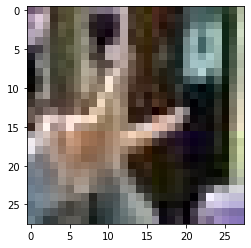

In [7]:
# 이미지 불러와보자

plt.imshow(x_train[0])
print('라벨: ', y_train[0]) # 가위(0)

# 2. 딥러닝 네트워크 설계
처음엔 성능을 고려하지 않고 예시에 나와있는대로 임의로 값을 대입했다. (하이퍼파라미터 조정 x)

In [8]:
# 모델 설정

import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))


model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

# 3. 딥러닝 네트워크 학습

In [9]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 3s 12ms/step - loss: 12.5902 - accuracy: 0.4267
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0721 - accuracy: 0.8033
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1850 - accuracy: 0.9300
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9933
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 8.3072e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 6.3957e-04 - accuracy: 1.0000


### 🌷 학습 정확도 = 1.0으로 아주 잘 나옴을 알 수 있다.
##### + 혹시 overfitting 된 것 아닐지 ..?

# 4. 테스트 하기
## 4-1. test data 불러오기

In [10]:
# !unzip -uq "test1/scissor (1).zip" -d "test1/scissor"
# !unzip -uq "test1/paper (1).zip" -d "test1/paper"
# !unzip -uq "test1/rock (1).zip" -d "test1/rock"

##### train data와 비슷한 방식으로 진행된다.
- 테스트 데이터도 마찬가지로 (다른) 300개의 데이터를 이용

In [11]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여 resize
s_path = './test1/scissor'
resize_images(s_path)
print('가위 이미지 resize 완료!')

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여 resize
r_path = './test1/rock'
resize_images(r_path)
print('바위 이미지 resize 완료!')

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여 resize
p_path = './test1/paper'
resize_images(p_path)
print('보 이미지 resize 완료!')

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


##### * 경로 변경으로 부득이하게 load_data 함수 재정의

In [12]:
def load_data(img_path, number_of_data):
    # 가위(0), 바위(1), 보(2)
    img_size = 28
    color = 3
    
    # 이미지 데이터와 라벨(가위(0), 바위(1), 보(2)) 데이터를 담을 행렬(matrix) 영역 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0 # 가위(0)
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1 # 바위(1)
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2 # 보(2)
        idx = idx + 1
    
    print('학습 데이터(x_test)의 이미지 개수는 ', idx, '입니다.')
    return imgs, labels

In [13]:
img_dir_path = './test1'
(x_test, y_test) = load_data(img_dir_path, 300)
x_test_norm = x_test / 255.0 # 입력은 0~1로 정규화


print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

학습 데이터(x_test)의 이미지 개수는  300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


## 4-2. 평가하기

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('test_loss: {} '.format(test_loss))
print('test_accuaracy: {}'.format(test_accuracy))

10/10 - 0s - loss: 16.1608 - accuracy: 0.3333
test_loss: 16.16078758239746 
test_accuaracy: 0.3333333432674408


### 🧤 정확도 = 0.33 : 매우 낮음 -> 보완 필요

## 5. 성능 보완하기

1. 하이퍼파라미터 이용
2. train 데이터 개수 늘리기 (300->1500) + 이미지 resize 하지 않기
3. train 데이터 개수 늘리기 (300->1500)
4. test 데이터 개수 줄이기 (300->30)
5. test 데이터 변경하기 (아이펠 제공)

## 5-(1) 하이퍼 파라미터 이용

In [15]:
print(x_train.shape)
print(y_train.shape)

(300, 28, 28, 3)
(300,)


##### + 하이퍼파라미터도 마찬가지로 임의 조정이 아니라 여러 범위를 주었으면 더 좋을듯

In [16]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1 = 16
n_channel_2 = 32
n_dense = 40
n_train_epoch = 20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                32040     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/20
10/10 [==============================] - 0s 3ms/step - loss: 21.7159 - accuracy: 0.3233
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 1.8726 - accuracy: 0.7233
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 0.3801 - accuracy: 0.9000
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9667
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9967
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 4.9811e-04 - accuracy: 1.0000
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 3.3549e-04 - accuracy: 1.0000
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 2.9305e-04 - accuracy: 1.0000
Epoch 10/20
10/10 [==============================] - 0s 3ms/step - loss: 2.7603e-04 - accuracy: 1.0000
Ep

### 🌷 학습 정확도 = 1.0
- 에포크는 6부터 1.0이 나와서 줄여도 된다고 판단

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('test_loss: {} '.format(test_loss))
print('test_accuaracy: {}'.format(test_accuracy))

10/10 - 0s - loss: 16.3456 - accuracy: 0.3333
test_loss: 16.3455753326416 
test_accuaracy: 0.3333333432674408


### 🧤 정확도 = 0.33
- 그대로!!!!!

## 5-(2) 데이터 수 늘리기 + resize하지 않기

- 애초에 원본 데이터 저장했으면 다시 다운로드 받을 일 없었음 ㅎㅎ

### train data 수가 적다고 판단해 가위바위보 이미지를 각각 500개, 총 1500개로 늘렸다.

In [19]:
# !unzip -uq "original_train/scissor3.zip" -d "original_train/scissor"
# !unzip -uq "original_train/paper3.zip" -d "original_train/paper"
# !unzip -uq "original_train/rock3.zip" -d "original_train/rock"

In [20]:
# 이미지 파일 크기 확인
s_path = './original_train/scissor'
s_img = glob.glob(s_path + '/*.jpg')
Image.open(s_img[0]).size

(224, 224)

### 이미지 크기를 조정하지 않았기 때문에 load_data_224()라는 함수로 새로 정의

In [21]:
def load_data_224(img_path, number_of_data): # 데이터 숫자 바꿔주기
    # 가위(0), 바위(1), 보(2)
    img_size = 224
    color = 3
    
    # 이미지 데이터와 라벨(가위(0), 바위(1), 보(2)) 데이터를 담을 행렬(matrix) 영역 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0 # 가위(0)
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1 # 바위(1)
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2 # 보(2)
        idx = idx + 1
    
    print('학습 데이터(x_train)의 이미지 개수는 ', idx, '입니다.')
    return imgs, labels

In [22]:
img_dir_path = './original_train'
(x_train_origin, y_train_origin) = load_data_224(img_dir_path, 1500)
x_train_norm_origin = x_train_origin / 255.0 # 입력은 0~1로 정규화

print('x_train_origin shape: {}'.format(x_train_origin.shape))
print('y_train_origin shape: {}'.format(y_train_origin.shape))

학습 데이터(x_train)의 이미지 개수는  1500 입니다.
x_train_origin shape: (1500, 224, 224, 3)
y_train_origin shape: (1500,)


- 이미지의 개수, 크기가 각각 1500, 224x224 임을 확인 가능

### 첫 번째 activation 함수를 relu가 아닌 softsign으로 변경했다.
+ 이에 관한 설명은 따로 정리할 것!

In [23]:
# 변경 가능한 하이퍼파라미터
n_channel_1 = 32
n_channel_2 = 64
n_dense = 36
n_train_epoch = 10

# model 생성 시 input_size를 28이 아닌 224로 변경해야 함
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='softsign', input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 36)                6718500   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [24]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_origin, y_train_origin, epochs=n_train_epoch)

Epoch 1/10
47/47 [==============================] - 4s 54ms/step - loss: 3.3809 - accuracy: 0.7440
Epoch 2/10
47/47 [==============================] - 2s 44ms/step - loss: 0.0435 - accuracy: 0.9833
Epoch 3/10
47/47 [==============================] - 2s 44ms/step - loss: 0.0326 - accuracy: 0.9913
Epoch 4/10
47/47 [==============================] - 2s 44ms/step - loss: 0.0057 - accuracy: 0.9993
Epoch 5/10
47/47 [==============================] - 2s 44ms/step - loss: 6.5659e-04 - accuracy: 1.0000
Epoch 6/10
47/47 [==============================] - 2s 44ms/step - loss: 1.8547e-04 - accuracy: 1.0000
Epoch 7/10
47/47 [==============================] - 2s 44ms/step - loss: 1.3347e-04 - accuracy: 1.0000
Epoch 8/10
47/47 [==============================] - 2s 44ms/step - loss: 9.6339e-05 - accuracy: 1.0000
Epoch 9/10
47/47 [==============================] - 2s 44ms/step - loss: 7.4837e-05 - accuracy: 1.0000
Epoch 10/10
47/47 [==============================] - 2s 44ms/step - loss: 6.1135e-05 - ac

### 🌷 학습 정확도 = 1.0

### test data도 resize하지 않고 load_data_224() 함수에 대입

In [25]:
img_dir_path = './original_test'
(x_test_origin, y_test_origin) = load_data_224(img_dir_path, 300)
x_test_norm_origin = x_test_origin / 255.0 # 입력은 0~1로 정규화


print('x_test_origin shape: {}'.format(x_test_origin.shape))
print('y_test_origin shape: {}'.format(y_test_origin.shape))

학습 데이터(x_train)의 이미지 개수는  300 입니다.
x_test_origin shape: (300, 224, 224, 3)
y_test_origin shape: (300,)


In [26]:
test_loss, test_accuracy = model.evaluate(x_test_origin, y_test_origin, verbose=2)
print('test_loss: {} '.format(test_loss))
print('test_accuaracy: {}'.format(test_accuracy))

10/10 - 0s - loss: 3.8100 - accuracy: 0.3533
test_loss: 3.8099963665008545 
test_accuaracy: 0.35333332419395447


### 🧤 정확도 = 0.35
- 아직도 너무 부족!!!

## 5-(3) resize하지 않고 데이터 수 늘리기
##### 총 1500개의 train data, 28x28

In [27]:
# !unzip -uq "my_train/scissor3.zip" -d "my_train/scissor"
# !unzip -uq "my_train/paper3.zip" -d "my_train/paper"
# !unzip -uq "my_train/rock3.zip" -d "my_train/rock"

In [28]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여 resize
s_path = './my_train/scissor'
resize_images(s_path)
print('가위 이미지 resize 완료!')

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여 resize
r_path = './my_train/rock'
resize_images(r_path)
print('바위 이미지 resize 완료!')

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여 resize
p_path = './my_train/paper'
resize_images(p_path)
print('보 이미지 resize 완료!')

500  images to be resized.
500  images resized.
가위 이미지 resize 완료!
500  images to be resized.
500  images resized.
바위 이미지 resize 완료!
500  images to be resized.
500  images resized.
보 이미지 resize 완료!


In [29]:
img_dir_path = './my_train'
(x_train, y_train) = load_data(img_dir_path, 1500)
x_train_norm = x_train / 255.0 # 입력은 0~1로 정규화


print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))

학습 데이터(x_test)의 이미지 개수는  1500 입니다.
x_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)


In [30]:
# 바꿔 볼 수 있는 하이퍼파라미터들

n_channel_1 = 32
n_channel_2 = 64
n_dense = 36
n_train_epoch = 10

# softsign으로 바꿈
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='softsign', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 36)                57636     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [31]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
47/47 [==============================] - 1s 4ms/step - loss: 0.7243 - accuracy: 0.7287
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9373
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.9733
Epoch 4/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9973
Epoch 5/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 8/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 10/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000


### 🌷 학습 정확도 = 1.0

### test data는 기존 것 (resize x) 그대로 사용

In [32]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('test_loss: {} '.format(test_loss))
print('test_accuaracy: {}'.format(test_accuracy))

10/10 - 0s - loss: 2.6206 - accuracy: 0.4967
test_loss: 2.620631456375122 
test_accuaracy: 0.49666666984558105


### 🧤 정확도 = 0.49
- 조금 올랐지만 역부족

## 5-4) 데이터 수 늘리기(1500) + 아이펠 test 데이터
### test data의 질이 좋지 않을 수 있다 생각해 제공해주신 걸로 변경해주었다.

In [33]:
# !unzip -uq "data.zip" -d "data"

In [34]:
img_dir_path = './data/test'
(x_test, y_test) = load_data(img_dir_path, 300)
x_test_norm = x_test / 255.0 # 입력은 0~1로 정규화


print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

학습 데이터(x_test)의 이미지 개수는  300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [35]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('test_loss: {} '.format(test_loss))
print('test_accuaracy: {}'.format(test_accuracy))

10/10 - 0s - loss: 1.3442 - accuracy: 0.7033
test_loss: 1.3441557884216309 
test_accuaracy: 0.70333331823349


### 🧤 정확도 = 0.70 !!!
#### 드디어 60%가 넘었다
- run 할 때마다 78% 넘을 때도, 60% 미만일 때도 있다.

*****************

# 결론

## >> 좀 더 정교한 많은 양의 train 데이터 + 뚜렷한 test data 필요

*****************

## * 깨달은 점 *

### 사실 크게 어렵거나 복잡한 내용은 아니지만 생각보다 accuracy가 너무 낮게 나와 오래 고생을 했다. 느낀점으로는

#### 1. 원본 train data가 매우 정교해야 함
    - 처음 찍은 300개의 데이터는 배경이 깔끔하지도 않았고, 손 모양을 이리저리 돌린 바람에 모델의 정교함이 떨어졌던 것 같다.
    - 정교함 뿐 아니라 데이터의 수도 300 -> 1500으로 증가시킨 것이 효과적이었고, 4500개 찍으신 분의 결과를 들어보니 정확도가 90% 이상이라 하심 !!
    - ** 결국 사진만 잘 찍어도 좋은 결과 나올 것 같다.
    
#### 2. 반복되는 작업으로  여러 폴더/파일들을 생성했는데, 이 때마다 파일명이 헷갈려서 애먹음
#### 3. 하이퍼파라미터를 임의로 조정하지 않고, 여러 범위들을 주어 최적의 값을 추출하는 편이 요구됨
#### 4. 초반에 resize(), load_data() 등 함수를 여러 번 반복해 정의하고 실행하였더니 정확도가 더 낮게 나온 것 같은데 연관이 있는지는 정확하게 모르겠다.
#### 5. 코드가 길어서 그런가 실행할 때마다의 accuracy의 편차가 다소 큼
#### 6. 생각보다 size 크기 변경은 큰 역할을 하지 않는구나

*****************

## 🗣 Raw Data의 특성을 잘 깨달은 첫 Exploration 이었다 :-)